# Materi Sesi 4

Advanced Visualization

In [1]:
import numpy as np
import pandas as pd

In [3]:
df_can = pd.read_csv('data.csv')
df_can.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
1,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [4]:
df_can.set_index('Country', inplace=True)

years = list(map(str, range(1980, 2014)))

In [ ]:
df_can.head(2)

## Regression Plots

In [19]:
!pip install seaborn

The system cannot find the path specified.


In [20]:
import seaborn as sns

In [22]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

In [24]:
df_tot.index = map(int, df_tot.index)

In [25]:
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']

In [26]:
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


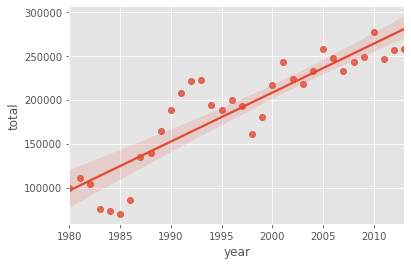

In [27]:
ax = sns.regplot(x='year', y='total', data=df_tot)

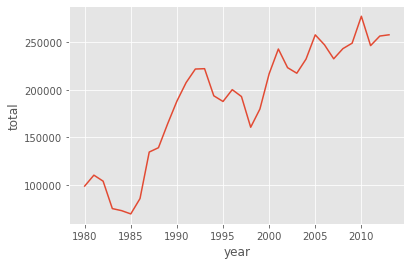

In [29]:
ax = sns.lineplot(x='year', y='total', data=df_tot)

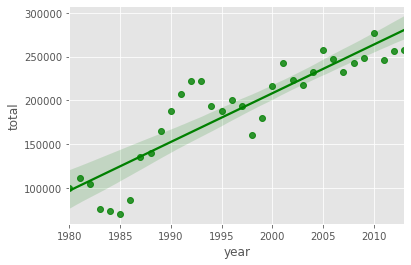

In [30]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

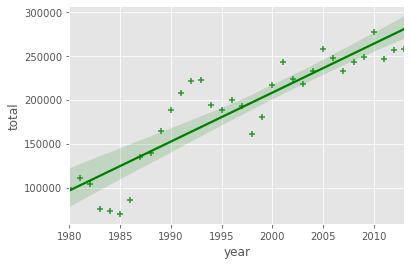

In [31]:
ax = sns.regplot(x='year',
                 y='total',
                 data=df_tot,
                 color='green',
                 marker='+')

## Folium

In [32]:
!pip install folium

The system cannot find the path specified.


In [33]:
import folium

In [35]:
world_map = folium.Map()

world_map

In [44]:
world_map = folium.Map(location=[-6.9910406, 110.4258334],
                      zoom_start=12)

world_map

In [45]:
world_map

In [43]:
world_map = folium.Map(location=[-6.9910406, 110.4258334],
                      zoom_start=12,
                      tiles='Stamen Toner')

world_map

In [46]:
world_map = folium.Map(location=[-6.9910406, 110.4258334],
                      zoom_start=12,
                      tiles='Stamen Terrain')

world_map

## Maps with Marker

In [47]:
df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [49]:
df_incidents.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168


In [50]:
df_incidents = df_incidents.iloc[0:100, :]

In [51]:
df_incidents.shape

(100, 13)

In [52]:
latitude = 37.77
longitude = -122.42

In [54]:
sanfran_map = folium.Map(location=[latitude, longitude],
                        zoom_start=12)

sanfran_map

In [55]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
sanfran_map.add_child(incidents)

In [56]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)


sanfran_map.add_child(incidents)

In [58]:
sanfran_map = folium.Map(location=[latitude, longitude],
                        zoom_start=12)

incidents = folium.map.FeatureGroup()

for lat, lng, label in zip(df_incidents.Y,
                           df_incidents.X,
                           df_incidents.Category):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=label
        )
    )

sanfran_map.add_child(incidents)

In [62]:
from folium import plugins

sanfran_map = folium.Map(location=[latitude, longitude],
                        zoom_start=12)

incidents = plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng, label in zip(df_incidents.Y,
                           df_incidents.X,
                           df_incidents.Category):
    incidents.add_child(
        folium.Marker(
            [lat, lng],
            icon=None,
            popup=label
        )
    )
    
sanfran_map.add_child(incidents)